# **Face Detection using OpenCV**

Import cv2 library

In [0]:
import cv2

**haarcascade_frontalface_default.xml** is a haar cascade designed by OpenCV to detect the frontal face. It works by training the thousands of negative with positive image superimposed on it.

In [0]:
!pip install wget
import requests
import wget
url = 'https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml'
filename = wget.download(url)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=8a9cdc244c86267cdc446054057f5cc01c3a793d107f5a3a8fa805829b0ac3f0
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
haarcascade_frontalface_default.xml


In [0]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + filename)

In [0]:
def detect(gray, frame):
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  for (x, y , w, h) in faces:
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 4)
    roi_gray = gray[y:y+h, x:x+w]
  return frame

In [0]:
# Uncomment below code to open webcam and run in terminal
"""
video_capture = cv2.VideoCapture(0)
print(video_capture.isOpened())
while True:
  _, frame = video_capture.read()
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  canvas = detect(gray, frame)
  cv2.imshow("Video", canvas)

  if cv2.waitkey(1) & 0xFF == ord('q'):
   break

video_capture.release()
cv2.destroyAllWindows()
"""

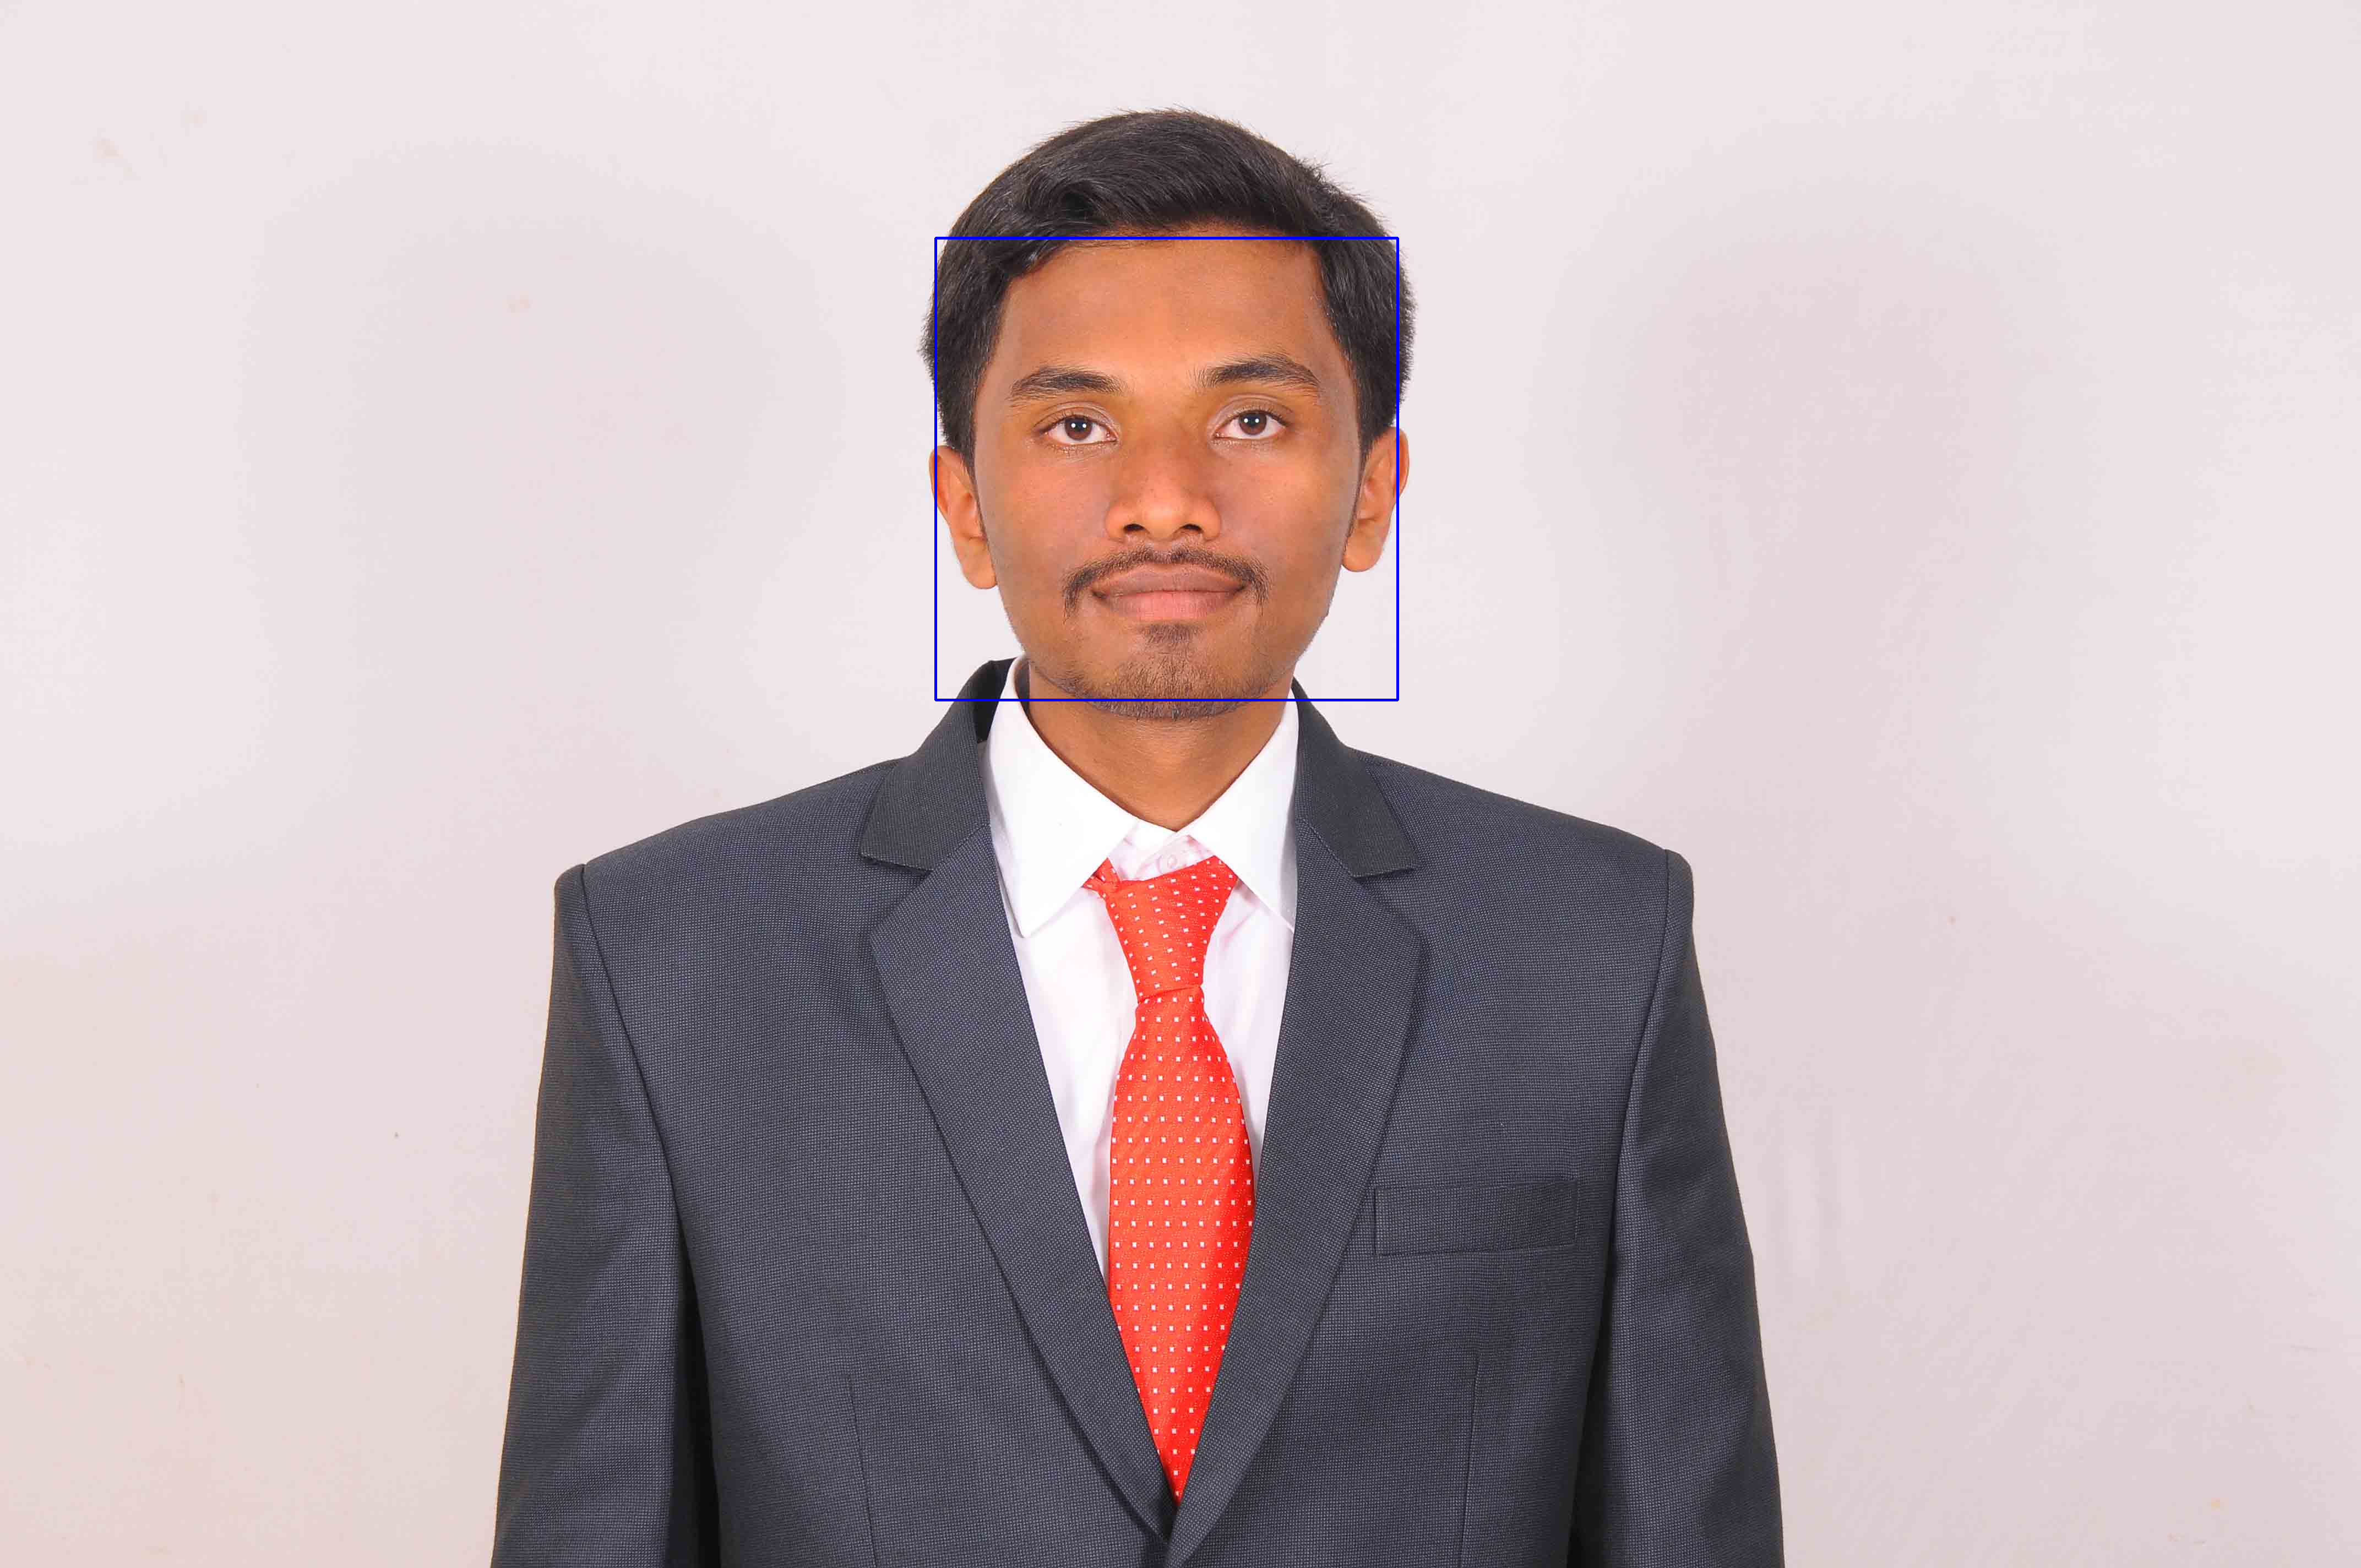

In [0]:
from google.colab.patches import cv2_imshow
img_url = 'https://gangadhars.files.wordpress.com/2020/05/dsc_7737.jpg'
image = wget.download(img_url)
image = cv2.imread(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canvas = detect(gray, image)
cv2_imshow(canvas)